In [1]:
# Import the necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
movies = pd.read_csv('../data/raw/ml-25m/movies.csv')
ratings = pd.read_csv('../data/raw/ml-25m/ratings.csv')
tags = pd.read_csv('../data/raw/ml-25m/tags.csv')

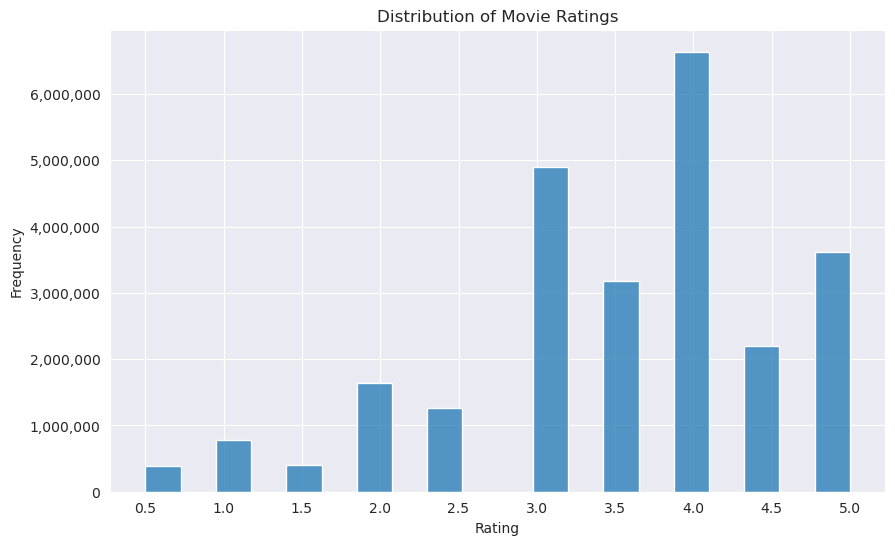

In [5]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=20)  # Remove the KDE line
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.ylabel('Frequency')

# Format the y-axis to display full numbers
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

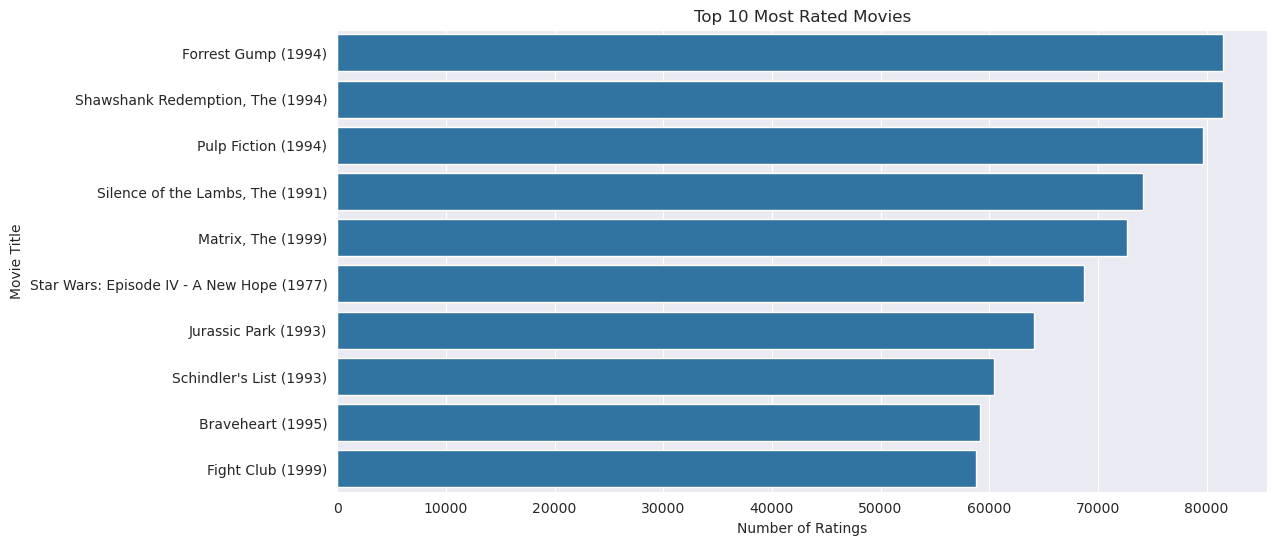

In [9]:
# Merge movie and rating data
merged_data = pd.merge(ratings, movies, on='movieId')

# Get most rated movies
most_rated_movies = merged_data.groupby('title').size().sort_values(ascending=False).head(10)

# Plot most rated movies
plt.figure(figsize=(12, 6))
sns.barplot(y=most_rated_movies.index, x=most_rated_movies.values)
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

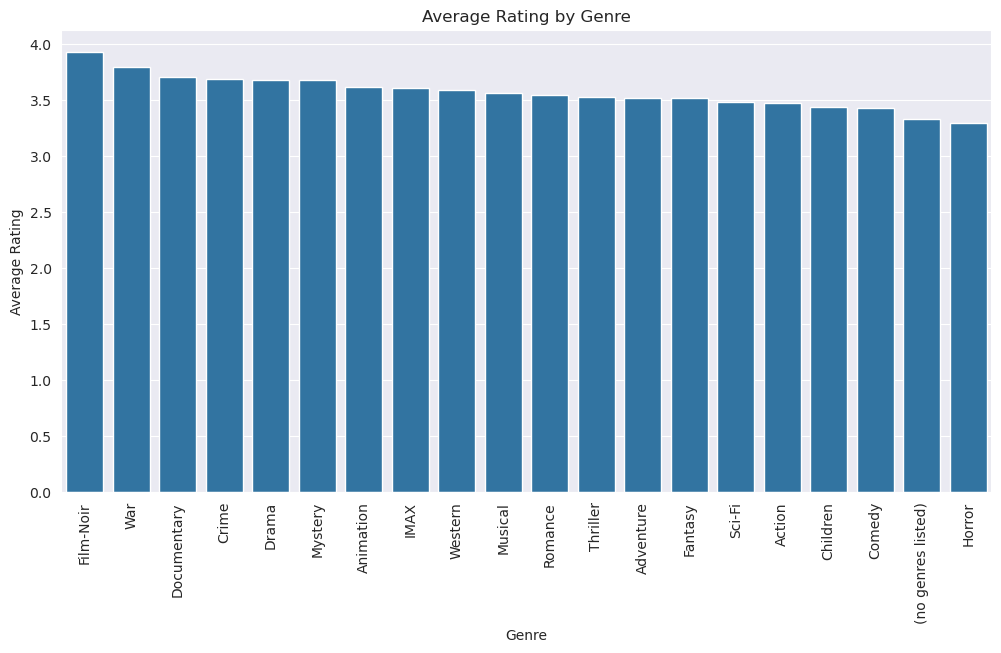

In [11]:
# Split genres and explode into separate rows
genres_data = movies.assign(genre=movies['genres'].str.split('|')).explode('genre')
genre_ratings = pd.merge(ratings, genres_data, on='movieId')

# Calculate average rating by genre
average_ratings_by_genre = genre_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Plot average ratings by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=average_ratings_by_genre.index, y=average_ratings_by_genre.values)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

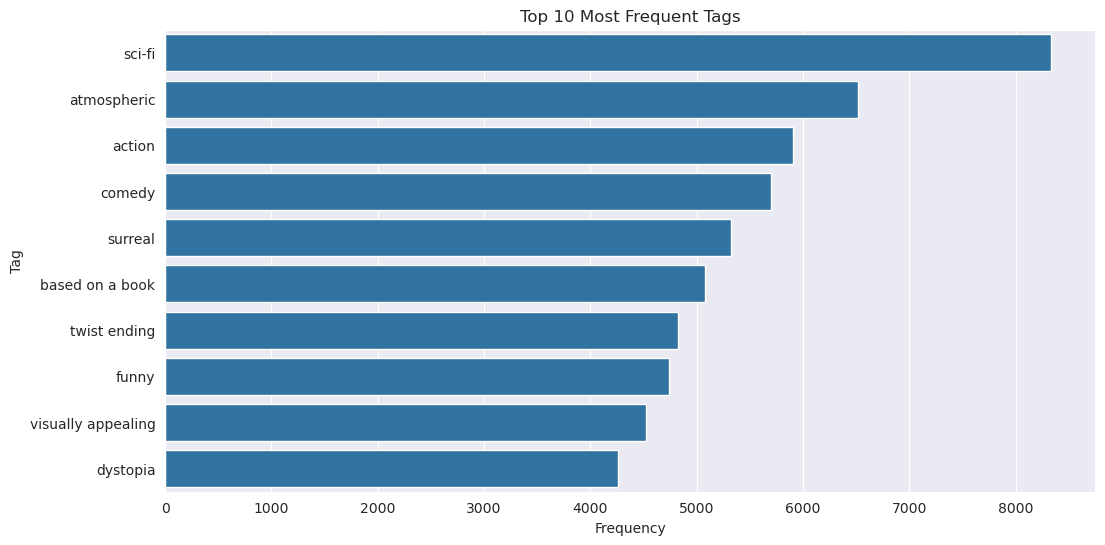

In [12]:
# Get most frequent tags
most_frequent_tags = tags['tag'].value_counts().head(10)

# Plot most frequent tags
plt.figure(figsize=(12, 6))
sns.barplot(y=most_frequent_tags.index, x=most_frequent_tags.values)
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

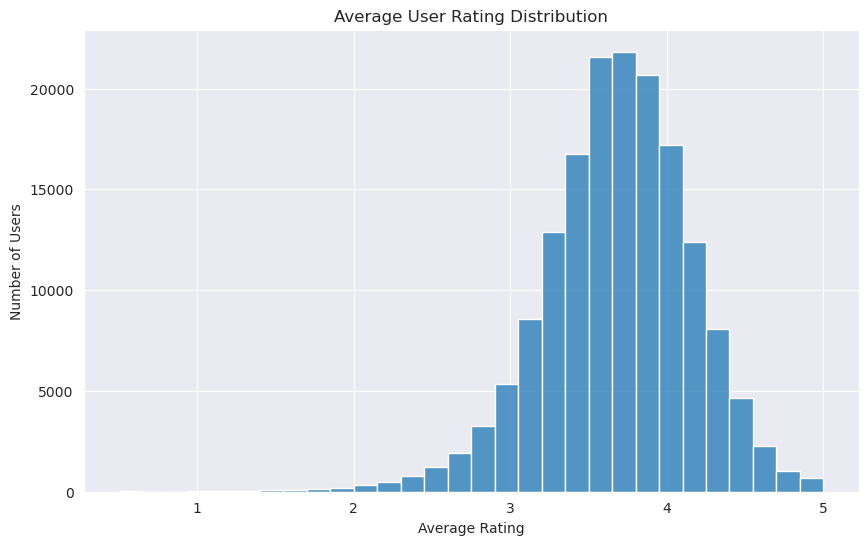

In [14]:
# Calculate average rating per user
average_user_ratings = ratings.groupby('userId')['rating'].mean()

# Plot average user ratings
plt.figure(figsize=(10, 6))
sns.histplot(average_user_ratings, bins=30)
plt.title('Average User Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

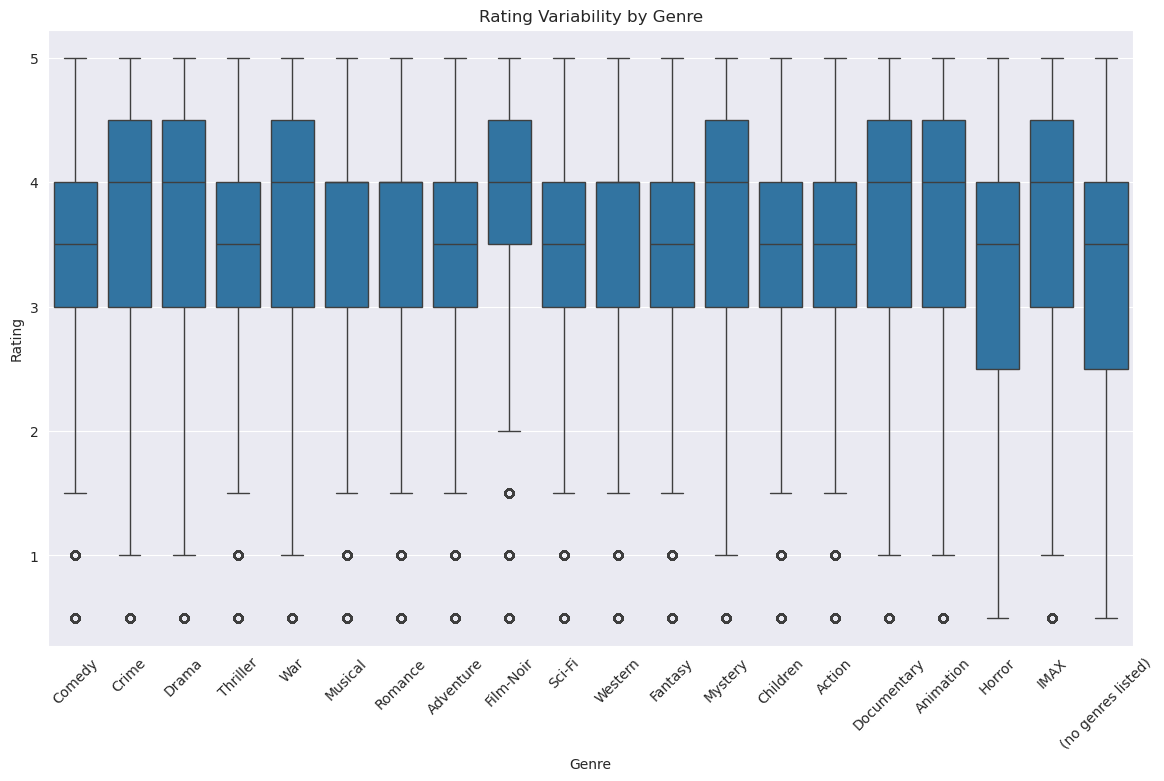

In [15]:
# Plot rating variability by genre
plt.figure(figsize=(14, 8))
sns.boxplot(data=genre_ratings, x='genre', y='rating')
plt.title('Rating Variability by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()